##  PBMC from [bbknn](https://github.com/Teichlab/bbknn/blob/master/examples/pbmc.ipynb) paper

In [37]:
import scanpy as sc
import numpy as np
sc.set_figure_params(frameon=False)

In [125]:
adata = sc.read("./data/PBMC/PBMC_bbknn.h5ad")

In [126]:
adata.obs.index = [i[1] for i in adata.obs.index.str.split("-")]

In [201]:
adata

AnnData object with n_obs × n_vars = 15476 × 1199 
    obs: 'Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method', 'Cell type'
    var: 'GeneName-0', 'GeneID-0', 'GeneName-1', 'GeneID-1', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell type_colors', 'Method_colors', 'Sample_colors', 'anno_colors', 'louvain', 'louvain_colors', 'neighbors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_tsne'

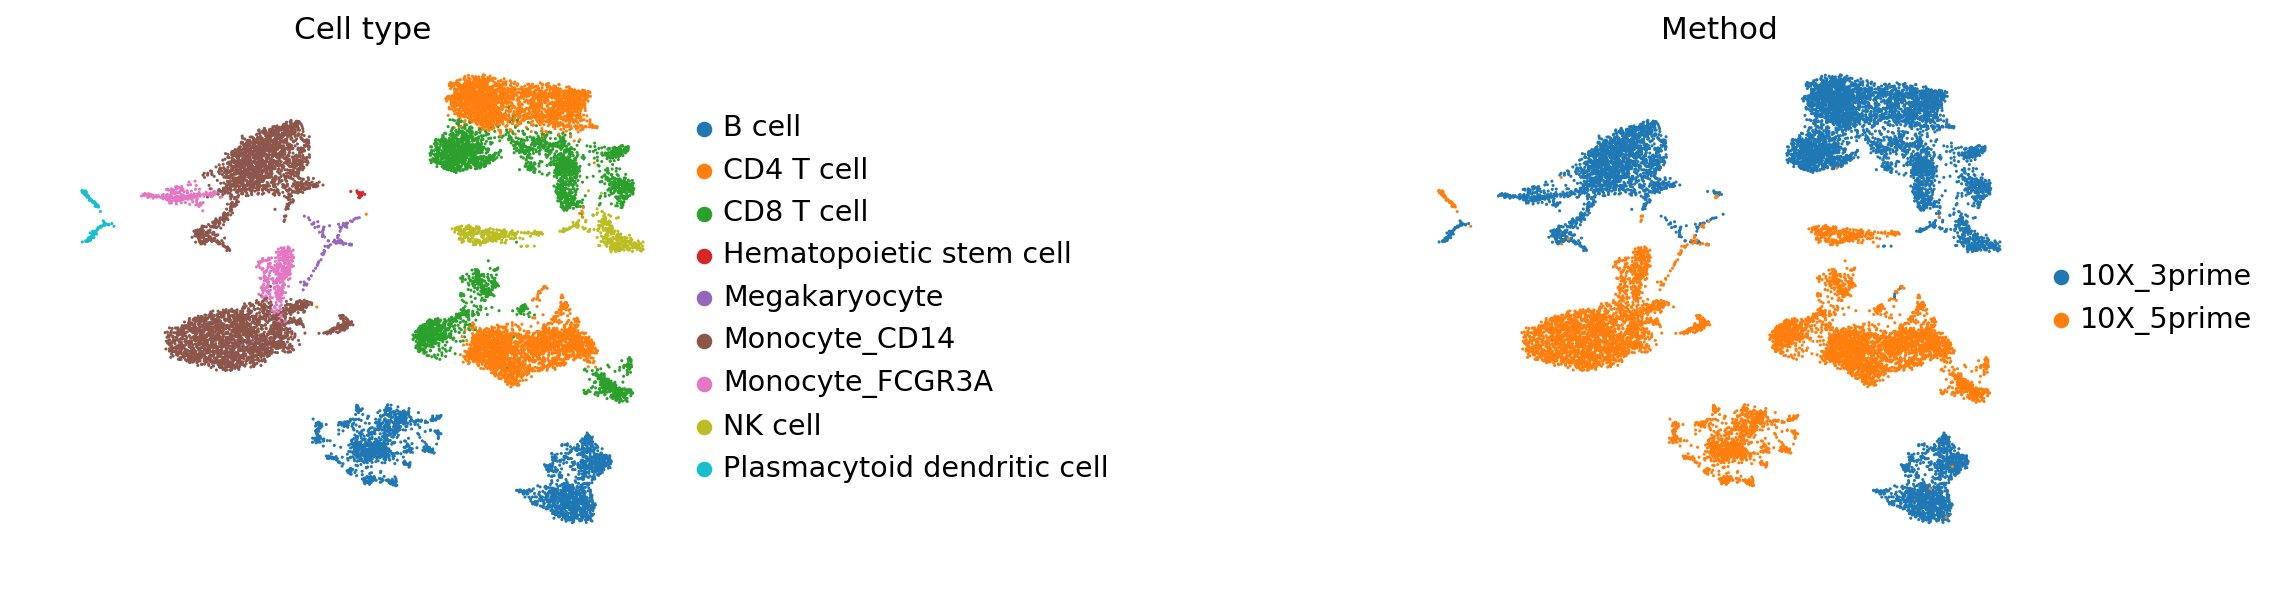

In [207]:
sc.pl.umap(adata, color=["Cell type", "Method"], wspace=True)

In [135]:
data = sc.AnnData(adata.X, var=adata.var)
data.obs["method"] = adata.obs["Method"].values
data.obs["cell_type"] = adata.obs["Cell type"].values
data.obs.index = adata.obs.index

In [136]:
data.obs["method"].value_counts() 

10X_3prime    8098
10X_5prime    7378
Name: method, dtype: int64

In [137]:
three_prime_bbknn = data[data.obs["method"] == "10X_3prime"]
five_prime_bbknn = data[data.obs["method"] == "10X_5prime"]

In [142]:
three_prime_bbknn

View of AnnData object with n_obs × n_vars = 8098 × 1199 
    obs: 'method', 'cell_type'
    var: 'GeneName-0', 'GeneID-0', 'GeneName-1', 'GeneID-1', 'means', 'dispersions', 'dispersions_norm'

In [143]:
five_prime_bbknn

View of AnnData object with n_obs × n_vars = 7378 × 1199 
    obs: 'method', 'cell_type'
    var: 'GeneName-0', 'GeneID-0', 'GeneName-1', 'GeneID-1', 'means', 'dispersions', 'dispersions_norm'

## Reading 10x datasets

In [213]:
five_prime_10x = sc.read_10x_mtx("./data/new_PBMC/filtered_gene_bc_matrices_5prime/GRCh38/",
                                 make_unique=False)
five_prime_10x

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 7726 × 33694 
    var: 'gene_ids'

In [214]:
three_prime_10x = sc.read_10x_mtx(
    "./data/new_PBMC/filtered_gene_bc_matrices_PBMC8k/GRCh38/",  make_unique=False)
three_prime_10x

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 8381 × 33694 
    var: 'gene_ids'

In [215]:
five_prime_10x.obs.index = [idx[0]
                            for idx in five_prime_10x.obs.index.str.split("-")]
three_prime_10x.obs.index = [idx[0]
                             for idx in three_prime_10x.obs.index.str.split("-")]

### subsetting original 10x datsets with ones labaled in bbknn paper 

In [216]:
five_prime_10x_sub = five_prime_10x.copy()[five_prime_bbknn.obs.index]
five_prime_10x_sub

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


View of AnnData object with n_obs × n_vars = 7378 × 33694 
    var: 'gene_ids'

In [217]:
three_prime_10x_sub = three_prime_10x.copy()[three_prime_bbknn.obs.index]
three_prime_10x_sub

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


View of AnnData object with n_obs × n_vars = 8098 × 33694 
    var: 'gene_ids'

In [218]:
five_prime_10x_sub.obs = five_prime_bbknn.obs
three_prime_10x_sub.obs = three_prime_bbknn.obs

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [219]:
all_10x_PBMC = sc.AnnData.concatenate(five_prime_10x_sub,three_prime_10x_sub,)

Making variable names unique for controlled concatenation.


### visualizing the raw data using UMAP 

In [196]:
sc.pp.neighbors(all_10x_PBMC)
sc.tl.umap(all_10x_PBMC)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/mohammad/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Note that this is original count data without any noramlization 

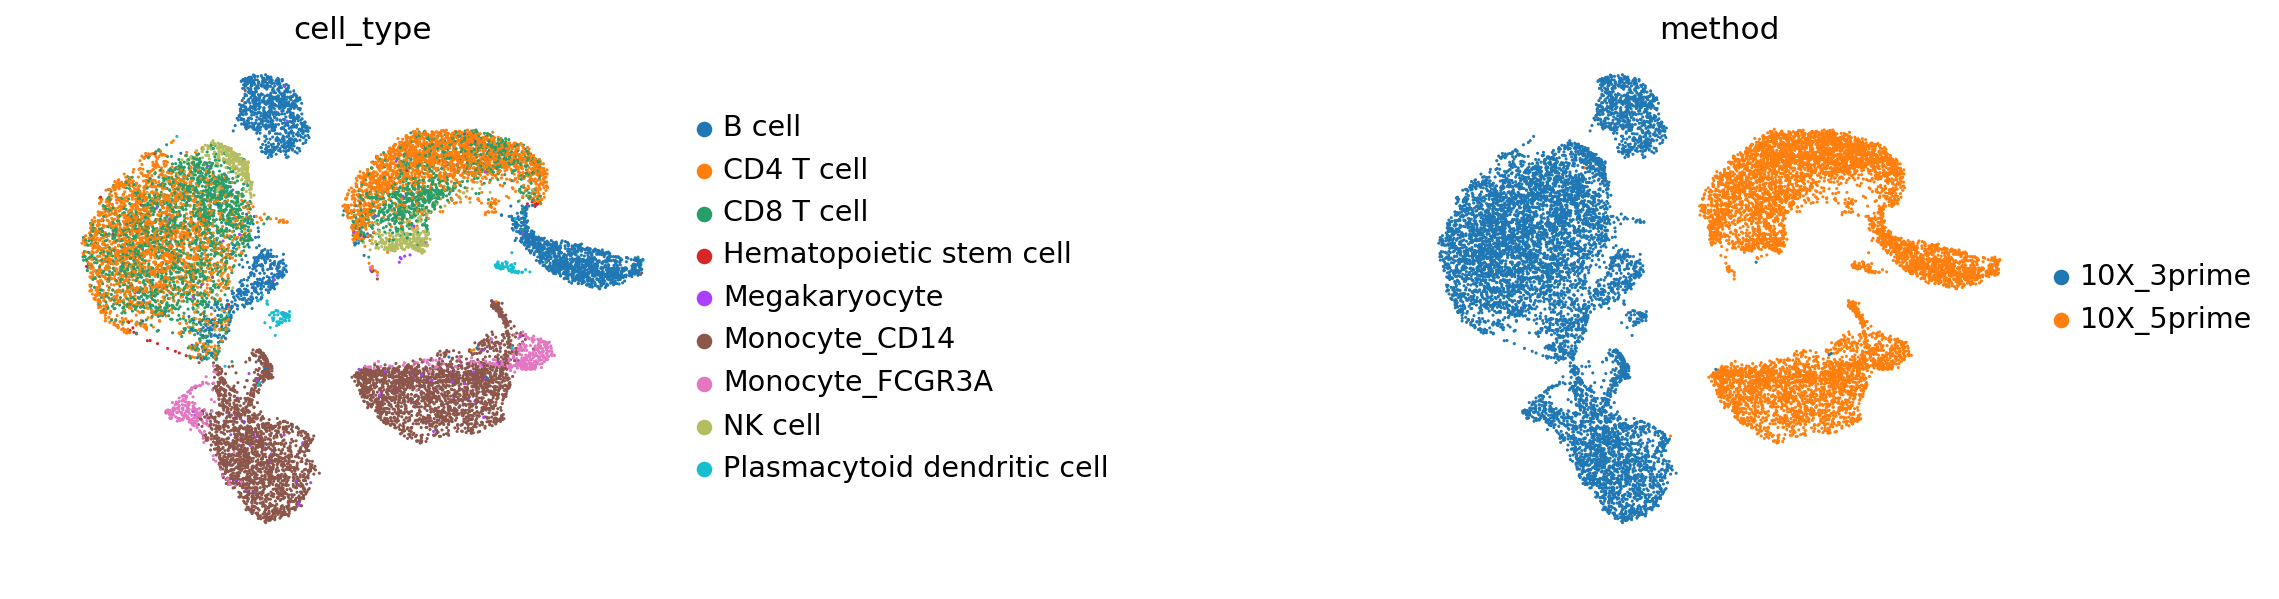

In [208]:
sc.pl.umap(all_10x_PBMC, color=["cell_type", "method"], wspace=True)

In [220]:
all_10x_PBMC.var_names = five_prime_10x.var_names

Index(['RP11-34P13.3', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'RP11-34P13.14', 'RP11-34P13.9', 'FO538757.3', 'FO538757.2',
       'AP006222.2',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231B'],
      dtype='object', length=33694)

In [222]:
all_10x_PBMC.write("./data/10x_PBMC_counts.h5ad")

... storing 'method' as categorical
